In diesem Notizbuch werde ich Informationen von einer Website sammeln

die Daten vorverarbeiten

Schlüsselphrasen und Wörter extrahieren

dann eine Tabelle anzeigen, die auf der Webseite vorhanden ist

daraus ein Foto visualisieren

In [32]:
# zuerst identifiziere ich die URL, mache eine HTTP-Anfrage, um sie abzurufen, sende eine „GET“-Anfrage, überprüfe den Status der Anfrage, ob sie funktioniert hat oder nicht

import requests
url = 'https://www.eia.gov/outlooks/steo/report/elec_coal_renew.php'
r = requests.get(url)
r.status_code

200

In [18]:
#nehme den HTML-Inhalt einer Webseite, analysiere ihn mit Beautiful Soup und dem integrierten HTML-Parser
#dann speichere ich das resultierende analysierte HTML-Dokument in der Variable parsed_html.
#und extrahiere dann Daten aus dem HTML mit den Methoden von Beautiful Soup.
import bs4
parsed_html = bs4.BeautifulSoup(r.text, "html.parser")
parsed_html

<!DOCTYPE html>

<html lang="en" xml:lang="en" xmlns="http://www.w3.org/1999/xhtml">
<head>
<title>Short-Term Energy Outlook - U.S. Energy Information Administration (EIA)</title>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=Edge" http-equiv="X-UA-Compatible"/>
<meta content="en-us" http-equiv="Content-Language"/>
<meta content="all" name="robots"/>
<meta content="EIA - Energy Information Administration" name="agency"/>
<meta content="official energy statistics, data, analysis and forecasting" name="subject"/>
<meta content="Energy Information Administration - EIA - Official Energy Statistics from the U.S. Government" name="Description"/>
<link href="/global/styles/screen.css" media="screen, projection" rel="stylesheet" type="text/css"/>
<link href="/global/styles/eia-styles.min.css?v=10.2" media="screen, projection" rel="stylesheet"/>
<link href="/global/scripts/jquery/datepicker/jquery-ui-dp.custom.css" rel="stylesheet" type="text/css"/>
<lin

In [19]:
# zeigt den Titel der Webseite an
print(parsed_html.title)

<title>Short-Term Energy Outlook - U.S. Energy Information Administration (EIA)</title>


In [20]:
# Prozesse wie Tokenisierung und Filterung von Stoppwörtern
import nltk
nltk.download('punkt')
nltk.download('stopwords')
import spacy

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
# Textextraktion, Satz-Tokenisierung und Berechnung der Satzanzahl
text = parsed_html.get_text()
nltk_sentences = nltk.sent_tokenize(text)
nlp = spacy.load("en_core_web_sm")
nltk_sentences[0]
doc = nlp(text)
spacy_sentences = list(doc.sents)
len(spacy_sentences)

75

In [22]:
# Drucken aller Sätze aus der Liste, die im vorherigen Code tokenisiert wurden
for sentence in spacy_sentences:
    print(sentence)




Short-Term Energy Outlook - U.S. Energy Information Administration (EIA)



























 













U.S. Energy Information Administration - EIA - Independent Statistics and Analysis






















 



Skip to sub-navigation


U.S. Energy Information Administration - EIA - Independent Statistics and Analysis


Search





Menu




+ Sources & Uses



+ Topics



+ Geography





+ Tools



+ Learn About Energy



+ News







Sources & Uses


Topics


Geography


Tools


Learn About Energy


News










Petroleum & Other Liquids

Crude oil, gasoline, heating oil, diesel, propane, and other liquids including biofuels and natural gas liquids.



This Week in Petroleum


Weekly Petroleum Status Report






Natural Gas

Exploration and reserves, storage, imports and exports, production, prices, sales.



Weekly Natural Gas Storage Report


Natural Gas Weekly Update






Electricity

Sales, revenue and prices, power plants, fuel use, stocks, generation, trade

In [23]:
# Hier erhalte ich die Häufigkeit der wichtigsten und wiederholten Wörter

# Importieren Sie Bibliotheken, die zum Zugriff auf Stoppwörter und zum Verarbeiten von Zeichenfolgen-bezogenen Aufgaben verwendet werden.
from nltk.corpus import stopwords
import string

# Holen Sie sich die gebräuchlichsten englischen Stoppwörter und die Satzzeichen
stop_words = set(stopwords.words('english'))
punctuations = set(string.punctuation)

# Durchführen einer Tokenisierung und Wortfrequenzanalyse für Sätze, die durch NLTK tokenisiert wurden, unter Herausfiltern von Stoppwörtern und Satzzeichen
tokens = {}
for s in nltk_sentences:
    sentence_tokens = nltk.word_tokenize(s)
    for t in sentence_tokens:
        if t not in stop_words and t not in punctuations:
            if t not in tokens:
                tokens[t] = 0
            tokens[t] += 1

# Holen Sie sich die 20 häufigsten Token
frequent_tokens = sorted(tokens, key=tokens.get, reverse=True)[:20]

# Drucken Sie die Ergebnisse
for t in frequent_tokens:
    print(t, "\t\t\t\t", tokens[t])

Energy 				 47
U.S. 				 39
2024 				 24
generation 				 17
electricity 				 17
forecast 				 16
Data 				 15
2025 				 15
EIA 				 14
Electricity 				 14
data 				 14
energy 				 14
coal 				 13
power 				 11
MMst 				 11
STEO 				 10
consumption 				 10
We 				 10
increase 				 10
Natural 				 9


In [24]:
# Extrahieren Sie die Schlüsselphrasen auf der Webseite

# Definieren Sie eine Funktion zum Extrahieren der Schlüsselphrasen
def extract_keyphrases(text):
    nlp = spacy.load("en_core_web_sm")
    doc = nlp(text)
    key_phrases = [chunk.text for chunk in doc.noun_chunks]
    return key_phrases


key_phrases = extract_keyphrases(text)
print("Key Phrases:", key_phrases[:10])

Key Phrases: ['EIA', 'Energy Information Administration - EIA - Independent Statistics', 'Analysis', 'Skip', '-navigation\n\n\nU.S. Energy Information Administration - EIA - Independent Statistics and Analysis\n\n\nSearch\n\n\n\n\n\nMenu', 'Sources', 'Uses', 'Topics', 'Geography', 'Tools']


In [25]:
# Erstellen eines Ordners, der Tabellen von der Webseite enthält
# Importieren der erforderlichen Bibliotheken zum Umgang mit Tabellen und zum Senden von HTTP-Anfragen und Öffnen von URLs

import pandas as pd
from urllib.request import Request, urlopen

tables = pd.read_html(url)
for i, table in enumerate(tables, start=1):
  file_name= f'table_{i}.csv'
  table.to_csv(file_name)

In [26]:
# Eine Tabelle anzeigen
first_table = pd.read_csv('table_1.csv')
first_table

,Unnamed: 0,"Electricity, Coal and Renewables","Electricity, Coal and Renewables.1","Electricity, Coal and Renewables.2","Electricity, Coal and Renewables.3","Electricity, Coal and Renewables.4"
0,NaN,Unnamed: 0_level_1,2022,2023,2024projected,2025projected
1,0.0,U.S. electricity generation (billion kilowatt...,4231,4178,4310,4349
2,1.0,Residential electricity price (cents per Kilo...,15.00,16.00,16.10,16.40
3,2.0,U.S. coal production (million short tons),590,580,510,500
4,3.0,U.S. coal consumption (million short tons),520,430,420,400
5,4.0,U.S. solar capacity (megawatts),72248,91621,127696,155871
6,5.0,U.S. wind capacity (megawatts),141275,147628,154894,159952
7,6.0,Note: Values in this table are rounded and may...,Note: Values in this table are rounded and may...,Note: Values in this table are rounded and may...,Note: Values in this table are rounded and may...,Note: Values in this table are rounded and may...


In [27]:
# führen Sie Vorverarbeitungsaktivitäten an der Tabelle durch, um sie zu organisieren
# machen Sie die erste Zeile (die Jahre enthält) zur Titelzeile
# entfernen Sie die erste Spalte, da sie unnötig ist
first_table.columns = first_table.iloc[0]
first_table = first_table[1:]
first_table.index.name = first_table.columns[0]
first_table = first_table.drop(first_table.columns[0], axis=1)
first_table

,Unnamed: 0_level_1,2022,2023,2024projected,2025projected
nan,,,,,
1,U.S. electricity generation (billion kilowatt...,4231,4178,4310,4349
2,Residential electricity price (cents per Kilo...,15.00,16.00,16.10,16.40
3,U.S. coal production (million short tons),590,580,510,500
4,U.S. coal consumption (million short tons),520,430,420,400
5,U.S. solar capacity (megawatts),72248,91621,127696,155871
6,U.S. wind capacity (megawatts),141275,147628,154894,159952
7,Note: Values in this table are rounded and may...,Note: Values in this table are rounded and may...,Note: Values in this table are rounded and may...,Note: Values in this table are rounded and may...,Note: Values in this table are rounded and may...


In [28]:
# hier suche ich nach den Bildern auf der Webseite

# zuerst analysiere ich den HTML-Inhalt
soup = bs4.BeautifulSoup(r.text, 'html.parser')
# alle Bilder finden
images = soup.find_all('img')
# und extrahieren Sie dann alle Bilder und ihre Namen und Links
for image in images:
    name = image['alt']
    link = image['src']
    print(name, link)

U.S. Energy Information Administration logo /global/images/logos/eia_logo_print.png
retail sales of electricity to the commercial sector, united states and selected regions ../images/TextFigures/TextFig_09.png
U.S. electric power coal stocks ../images/TextFigures/TextFig_10.png


Processing URL: https://www.eia.gov/global/images/logos/eia_logo_print.png
Saved U.S._Energy_Information_Administration_logo from https://www.eia.gov/global/images/logos/eia_logo_print.png to /content/downloaded_images/U.S._Energy_Information_Administration_logo.png
Processing URL: https://www.eia.gov/outlooks/steo/images/TextFigures/TextFig_09.png
Saved retail_sales_of_electricity_to_the_commercial_sector,_united_states_and_selected_regions from https://www.eia.gov/outlooks/steo/images/TextFigures/TextFig_09.png to /content/downloaded_images/retail_sales_of_electricity_to_the_commercial_sector,_united_states_and_selected_regions.png
Processing URL: https://www.eia.gov/outlooks/steo/images/TextFigures/TextFig_10.png
Saved U.S._electric_power_coal_stocks from https://www.eia.gov/outlooks/steo/images/TextFigures/TextFig_10.png to /content/downloaded_images/U.S._electric_power_coal_stocks.png


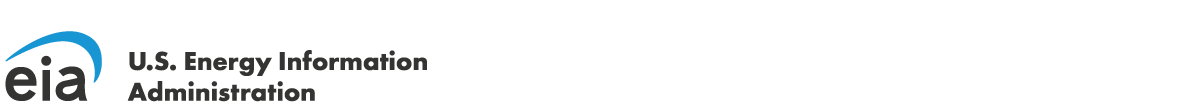

In [29]:
# Lädt Bilder von einer Webseite herunter, speichert sie in einem lokalen Verzeichnis und zeigt optional das erste gespeicherte Bild an. Außerdem behandelt es Fälle, in denen keine Bilder gefunden und gespeichert werden.

# zuerst importiere ich Bibliotheken, die zum Anzeigen von Bildern im Notebook, zum Verbinden relativer URLs mit der Basis-URL und zur Interaktion mit dem Betriebssystem verwendet werden
from IPython.display import display, Image
from urllib.parse import urljoin
import os

# Erstellen Sie ein Verzeichnis zum Speichern der Bilder im Colab-Dateisystem
output_dir = '/content/downloaded_images'
os.makedirs(output_dir, exist_ok=True)

# Iterieren Sie über jedes Bild-Tag und speichern Sie die Bilder
saved_images = []
for image in images:
    name = image.get('alt', 'no_alt').replace(' ', '_').replace('/', '_').replace('\\', '_')
    link = image['src']

    # Relative URLs in absolute URLs umwandeln
    link = urljoin(url, link)

    # Debuggen: Drucken Sie die URL, die verarbeitet wird
    print(f"Processing URL: {link}")

    # Laden Sie das Bild herunter
    img_data = requests.get(link).content

    # Erstellen Sie einen gültigen Dateinamen und speichern Sie das Bild
    filename = os.path.join(output_dir, f"{name}.png")
    with open(filename, 'wb') as f:
        f.write(img_data)

    saved_images.append(filename)
    print(f"Saved {name} from {link} to {filename}")

# Eines der gespeicherten Bilder anzeigen
if saved_images:
    display(Image(filename=saved_images[0]))
else:
    print("No images found and saved.")

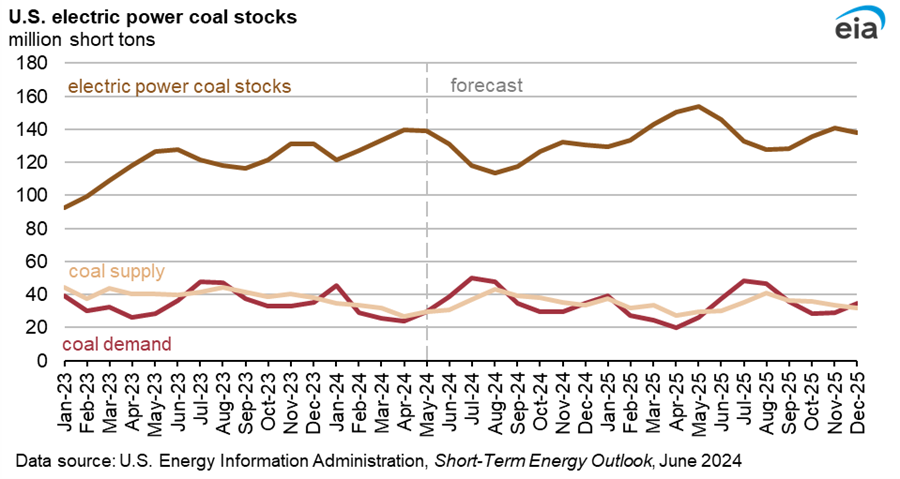

In [30]:
# hier zeige ich ein Foto, das die Vorräte der US-amerikanischen Stromkohle zeigt
# ich wähle den Ordner und den Ordner aus und zeige dann das Bild an.

from IPython.display import display, Image

filename = 'U.S._electric_power_coal_stocks.png'

image_path = f'/content/downloaded_images/{filename}'

display(Image(filename=image_path))

Reference:

the used Link: https://www.eia.gov/outlooks/steo/report/elec_coal_renew.php
and it was accessed on (13/06/2024)